Average residence time: 378.7882506
The dispersion: 31570.3802070


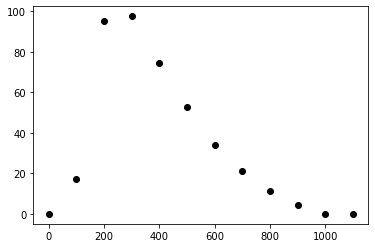

In [7]:
import matplotlib.pyplot as plt
import scipy.integrate as spi

# data
t = [0, 100, 200,  300,  400,  500, 600, 700,  800, 900, 1000, 1100]
c = [0,  17,  95, 97.5, 74.5, 52.5,  34,  21, 11.5, 4.5, 0.01, 0]

# plot
plt.plot(t,c, 'ok')

E   = c/spi.trapz(c,t)
tav = spi.trapz(t*E, t)
print('Average residence time: %.7f'%tav)
disp  = spi.trapz((t - tav)**2*E, t)
print('The dispersion: %.7f'%disp)


In [9]:

import matplotlib.pyplot as plt
import numpy as np

# data
t = np.array([0, 100, 200,  300,  400,  500, 600, 700,  800, 900, 1000, 1100])
c = np.array([0,  17,  95, 97.5, 74.5, 52.5,  34,  21, 11.5, 4.5, 0.01, 0])


def myTrapz(f,x):
    A = np.zeros(len(x)-1)
    A[0::] = (x[1::] - x[0:-1])*(f[0:-1] + f[1::])/2
    return sum(A)

tav = myTrapz(t*c/myTrapz(c,t),t)
print('Average residence time: %.7f'%tav)

Average residence time: 378.7882506


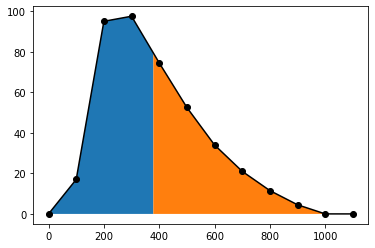

In [10]:

import matplotlib.pyplot as plt
import scipy.integrate as spi
import numpy as np
from scipy.interpolate import interp1d
# data
t = [0, 100, 200,  300,  400,  500, 600, 700,  800, 900, 1000, 1100]
c = [0,  17,  95, 97.5, 74.5, 52.5,  34,  21, 11.5, 4.5, 0.01, 0]

# plot
plt.plot(t,c, 'ok')

# Calculate average RT and dispersion
E   = c/spi.trapz(c,t)
tav = spi.trapz(t*E, t)
disp  = spi.trapz((t - tav)**2*E, t)

# Create times for plotting
tleft = np.linspace(0,tav,100)
tright = np.linspace(tav, t[-1],100)
tt = np.linspace(t[0], t[-1], 100)

# interpolate data
f =interp1d(t,c)

# Fill left and right with different colors
plt.plot(tt, f(tt), 'k-')
plt.fill_between(tleft,f(tleft),0)
plt.fill_between(tright,f(tright),0)
